In [1]:
import numpy as np

In [17]:
def f(x, delta=0.01):
    return (x[1] - x[0]**2)**2 + delta*(1 - x[0])**2

def grad_f(x, delta=0.01):
    return np.array([-2*x[0]*(x[1]-x[0]**2) - 2*delta*(1-x[0]), 2*(x[1]-x[0]**2)])

def armijo_step(x, delta=0.01, alpha=0.5, beta=0.5, c=1, max_iter=50):
    t = 1
    for i in range(max_iter):
        if f(x - t*grad_f(x, delta)) <= f(x) + alpha*t*grad_f(x, delta).dot(grad_f(x, delta)):
            return t
        else:
            t = beta*t
    raise ValueError("Armijo rule failed to find a suitable step size.")

def steepest_descent_armijo(x0, delta=0.01, alpha=0.5, beta=0.5, c=1, max_iter=1000, tol=1e-5):
    x = x0
    for k in range(max_iter):
        grad = grad_f(x, delta)
        if np.linalg.norm(grad) <= tol:
            break
        tk = armijo_step(x, delta, alpha, beta, c)
        x -= tk*grad
    return {"x": x, "f": f(x, delta), "iter": k}


In [18]:
result1 = steepest_descent_armijo(np.array([-0.8, 0.8]))
print(result1)

{'x': array([0.67870122, 0.53520223]), 'f': 0.006592549470344644, 'iter': 999}


In [9]:
result2 = steepest_descent_armijo(np.array([0, 0]))
print(result2)

{'x': array([0.67478451, 0.5394591 ]), 'f': 0.00813466172727401, 'iter': 999}


In [10]:
result3 = steepest_descent_armijo(np.array([1.5, 1]))
print(result3)

{'x': array([-1.6114607,  2.5598055]), 'f': 0.06956627753525726, 'iter': 999}


/var/folders/t6/33f7q3bx3xs8xgmhs2zpyyhc0000gn/T/ipykernel_55538/2588860380.py:2: RuntimeWarning: overflow encountered in double_scalars
  return (x[1] - x[0]**2)**2 + delta*(1 - x[0])**2
/var/folders/t6/33f7q3bx3xs8xgmhs2zpyyhc0000gn/T/ipykernel_55538/2554472804.py:13: RuntimeWarning: invalid value encountered in true_divide
  tk = np.linalg.norm(grad)**2 / grad.dot(np.array([[2*x[0]**2-2*x[1]+2*delta*x[0]-2],
/var/folders/t6/33f7q3bx3xs8xgmhs2zpyyhc0000gn/T/ipykernel_55538/2588860380.py:5: RuntimeWarning: overflow encountered in double_scalars
  return np.array([-2*x[0]*(x[1]-x[0]**2) - 2*delta*(1-x[0]), 2*(x[1]-x[0]**2)])
/var/folders/t6/33f7q3bx3xs8xgmhs2zpyyhc0000gn/T/ipykernel_55538/2588860380.py:2: RuntimeWarning: invalid value encountered in double_scalars
  return (x[1] - x[0]**2)**2 + delta*(1 - x[0])**2
/var/folders/t6/33f7q3bx3xs8xgmhs2zpyyhc0000gn/T/ipykernel_55538/2588860380.py:5: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([-2*x[0]*(x[1]

ValueError: x and y must have same first dimension, but have shapes (1000,) and (1001,)

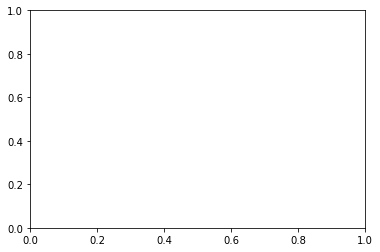

In [14]:
import matplotlib.pyplot as plt

def steepest_descent(x0, step_size_method="armijo", delta=0.01, alpha=0.5, beta=0.5, c=1, max_iter=1000, tol=1e-5):
    x = x0
    f_vals = [f(x, delta)]
    for k in range(max_iter):
        grad = grad_f(x, delta)
        if np.linalg.norm(grad) <= tol:
            break
        if step_size_method == "armijo":
            tk = armijo_step(x, delta, alpha, beta, c)
        elif step_size_method == "exact":
            tk = np.linalg.norm(grad)**2 / grad.dot(np.array([[2*x[0]**2-2*x[1]+2*delta*x[0]-2],
                                                              [2*x[1]-2*x[0]**2]]))
        elif step_size_method == "decreasing":
            tk = c / np.sqrt(k+1)
        else:
            raise ValueError("Invalid step size method.")
        x = x - tk*grad
        f_vals.append(f(x, delta))
    return {"x": x, "f_vals": f_vals, "iter": k}

# Starting point x0 = (-0.8, 0.8)
result1_armijo = steepest_descent(np.array([-0.8, 0.8]), "armijo")
result1_exact = steepest_descent(np.array([-0.8, 0.8]), "exact")
result1_decreasing = steepest_descent(np.array([-0.8, 0.8]), "decreasing")

# Starting point x0 = (0, 0)
result2_armijo = steepest_descent(np.array([0, 0]), "armijo")
result2_exact = steepest_descent(np.array([0, 0]), "exact")
result2_decreasing = steepest_descent(np.array([0, 0]), "decreasing")

# Starting point x0 = (1.5, 1)
result3_armijo = steepest_descent(np.array([1.5, 1]), "armijo")
result3_exact = steepest_descent(np.array([1.5, 1]), "exact")
result3_decreasing = steepest_descent(np.array([1.5, 1]), "decreasing")

# Plot error vs. iteration number
plt.plot(range(result1_armijo["iter"]+1), np.abs(result1_armijo["f_vals"] - f(np.array([1, 1]), 0.01)), label="Armijo")
plt.plot(range(result1_exact["iter"]+1), np.abs(result1_exact["f_vals"] - f(np.array([1, 1]), 0.01)), label="Exact")
plt.plot(range(result1_decreasing["iter"]+1), np.abs(result1_decreasing["f_vals"] - f(np.array([1, 1]), 0.01)), label="Decreasing")
plt.legend()
plt.xlabel("Iteration number")
plt.ylabel("|f(xk) - f(x*)|")
plt.title("Starting point (-0.8, 0.8)")
plt.show()

plt.plot(range(result2_armijo["iter"]+1), np.abs(result2_armijo["f_vals"] - f(np.array([1, 1]), 0.01)), label="Armijo")
#plt.plot(range(result2_exact["iter"]+1), np.abs


/var/folders/t6/33f7q3bx3xs8xgmhs2zpyyhc0000gn/T/ipykernel_55538/2588860380.py:2: RuntimeWarning: overflow encountered in double_scalars
  return (x[1] - x[0]**2)**2 + delta*(1 - x[0])**2
/var/folders/t6/33f7q3bx3xs8xgmhs2zpyyhc0000gn/T/ipykernel_55538/677944628.py:13: RuntimeWarning: invalid value encountered in true_divide
  tk = np.linalg.norm(grad)**2 / grad.dot(np.array([[2*x[0]**2-2*x[1]+2*delta*x[0]-2],
/var/folders/t6/33f7q3bx3xs8xgmhs2zpyyhc0000gn/T/ipykernel_55538/2588860380.py:5: RuntimeWarning: overflow encountered in double_scalars
  return np.array([-2*x[0]*(x[1]-x[0]**2) - 2*delta*(1-x[0]), 2*(x[1]-x[0]**2)])
/var/folders/t6/33f7q3bx3xs8xgmhs2zpyyhc0000gn/T/ipykernel_55538/2588860380.py:2: RuntimeWarning: invalid value encountered in double_scalars
  return (x[1] - x[0]**2)**2 + delta*(1 - x[0])**2
/var/folders/t6/33f7q3bx3xs8xgmhs2zpyyhc0000gn/T/ipykernel_55538/2588860380.py:5: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([-2*x[0]*(x[1]-

Text(0.5, 0, 'Iteration number')

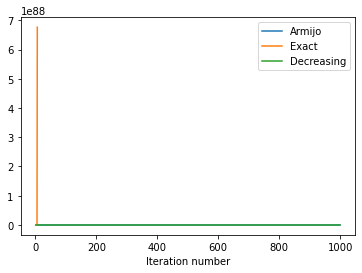

In [15]:
import matplotlib.pyplot as plt

def steepest_descent(x0, step_size_method="armijo", delta=0.01, alpha=0.5, beta=0.5, c=1, max_iter=1000, tol=1e-5):
    x = x0
    f_vals = [f(x, delta)]
    for k in range(max_iter):
        grad = grad_f(x, delta)
        if np.linalg.norm(grad) <= tol:
            break
        if step_size_method == "armijo":
            tk = armijo_step(x, delta, alpha, beta, c)
        elif step_size_method == "exact":
            tk = np.linalg.norm(grad)**2 / grad.dot(np.array([[2*x[0]**2-2*x[1]+2*delta*x[0]-2],
                                                              [2*x[1]-2*x[0]**2]]))
        elif step_size_method == "decreasing":
            tk = c / np.sqrt(k+1)
        else:
            raise ValueError("Invalid step size method.")
        x = x - tk*grad
        f_vals.append(f(x, delta))
    return {"x": x, "f_vals": f_vals, "iter": k}

# Starting point x0 = (-0.8, 0.8)
result1_armijo = steepest_descent(np.array([-0.8, 0.8]), "armijo")
result1_exact = steepest_descent(np.array([-0.8, 0.8]), "exact")
result1_decreasing = steepest_descent(np.array([-0.8, 0.8]), "decreasing")

# Starting point x0 = (0, 0)
result2_armijo = steepest_descent(np.array([0, 0]), "armijo")
result2_exact = steepest_descent(np.array([0, 0]), "exact")
result2_decreasing = steepest_descent(np.array([0, 0]), "decreasing")

# Starting point x0 = (1.5, 1)
result3_armijo = steepest_descent(np.array([1.5, 1]), "armijo")
result3_exact = steepest_descent(np.array([1.5, 1]), "exact")
result3_decreasing = steepest_descent(np.array([1.5, 1]), "decreasing")

# Plot error vs. iteration number
plt.plot(range(1, result1_armijo["iter"]+2), np.abs(result1_armijo["f_vals"][1:] - f(np.array([1, 1]), 0.01)), label="Armijo")
plt.plot(range(1, result1_exact["iter"]+2), np.abs(result1_exact["f_vals"][1:] - f(np.array([1, 1]), 0.01)), label="Exact")
plt.plot(range(1, result1_decreasing["iter"]+2), np.abs(result1_decreasing["f_vals"][1:] - f(np.array([1, 1]), 0.01)), label="Decreasing")
plt.legend()
plt.xlabel("Iteration number")
#plt.ylabel("|f(xk) -
